# Importing Libraries






In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries

In [2]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


# Displaying Images

In [3]:
picture_size = 48
folder_path = "C:/Users/KIIT/Desktop/CODES/Project/images"

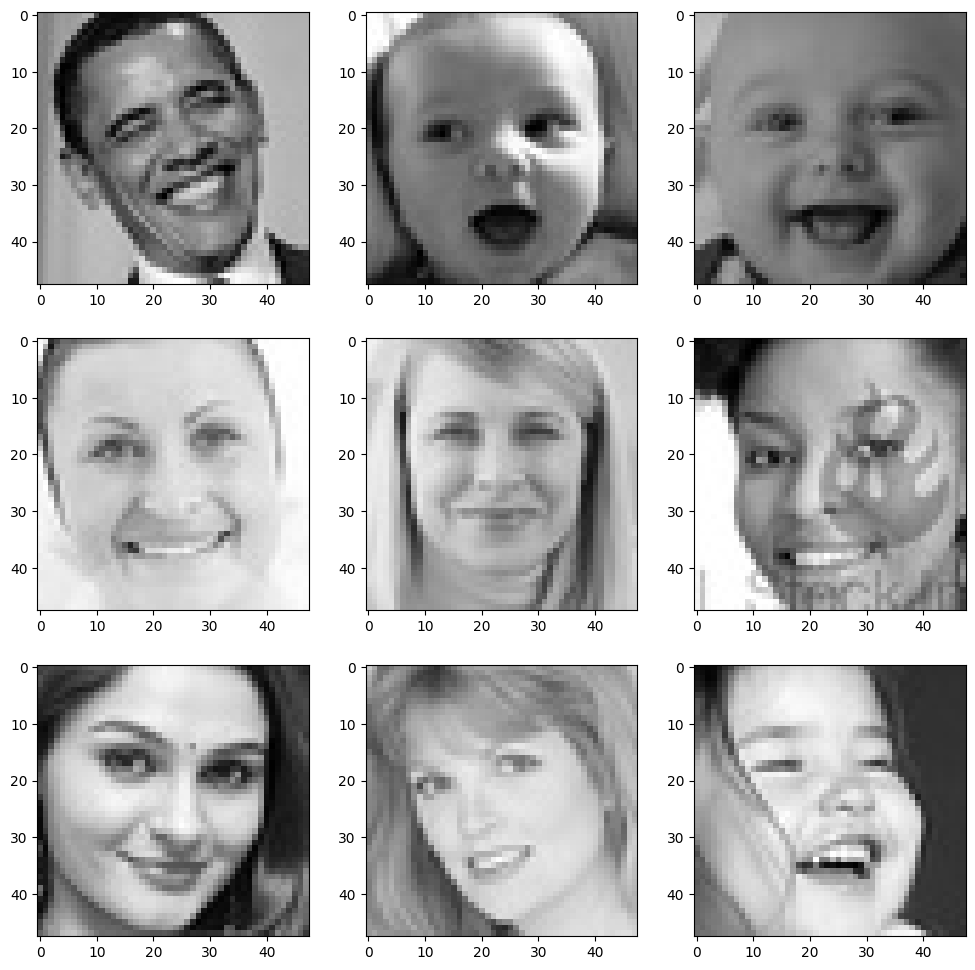

In [4]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

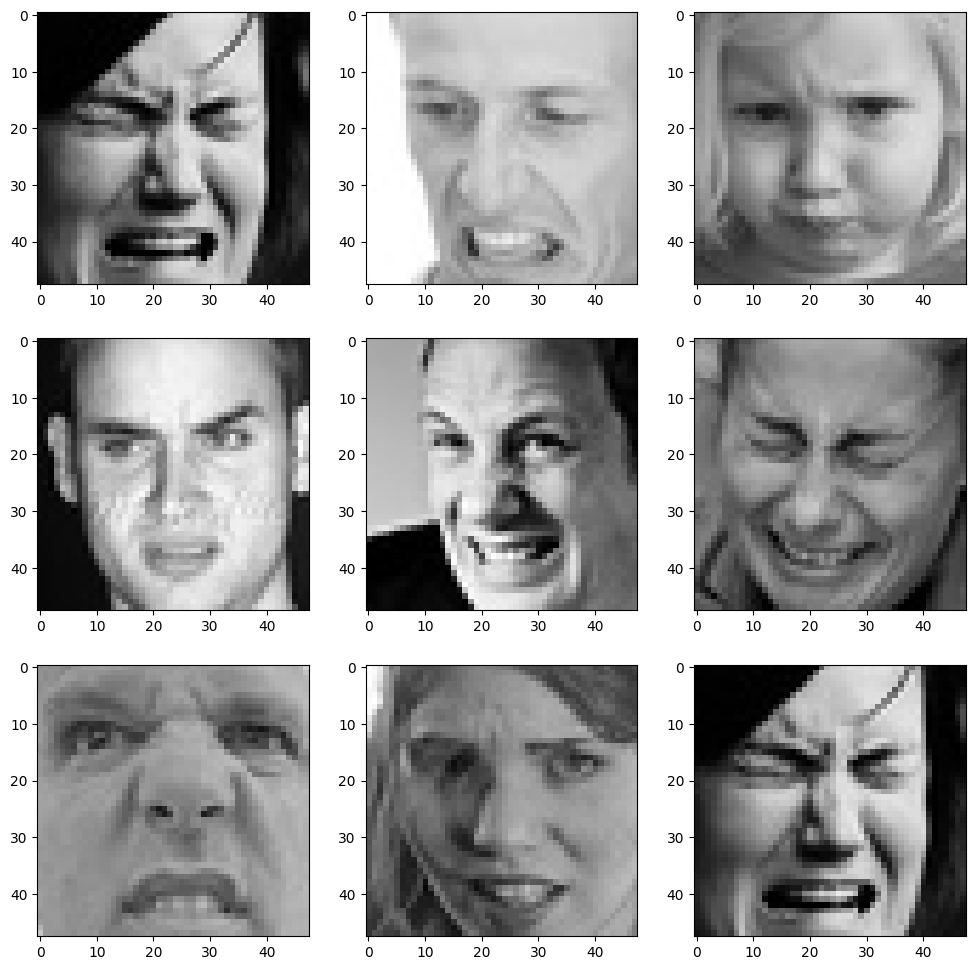

In [5]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [6]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"/train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"/validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
input_shape = (48, 48, 1)  # for grayscale images
# input_shape = (48, 48, 3)  # for color images

model = tf.keras.models.Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layer 4
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output
    Flatten(),
    
    # Fully connected layer 1
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # Fully connected layer 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # Output layer
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

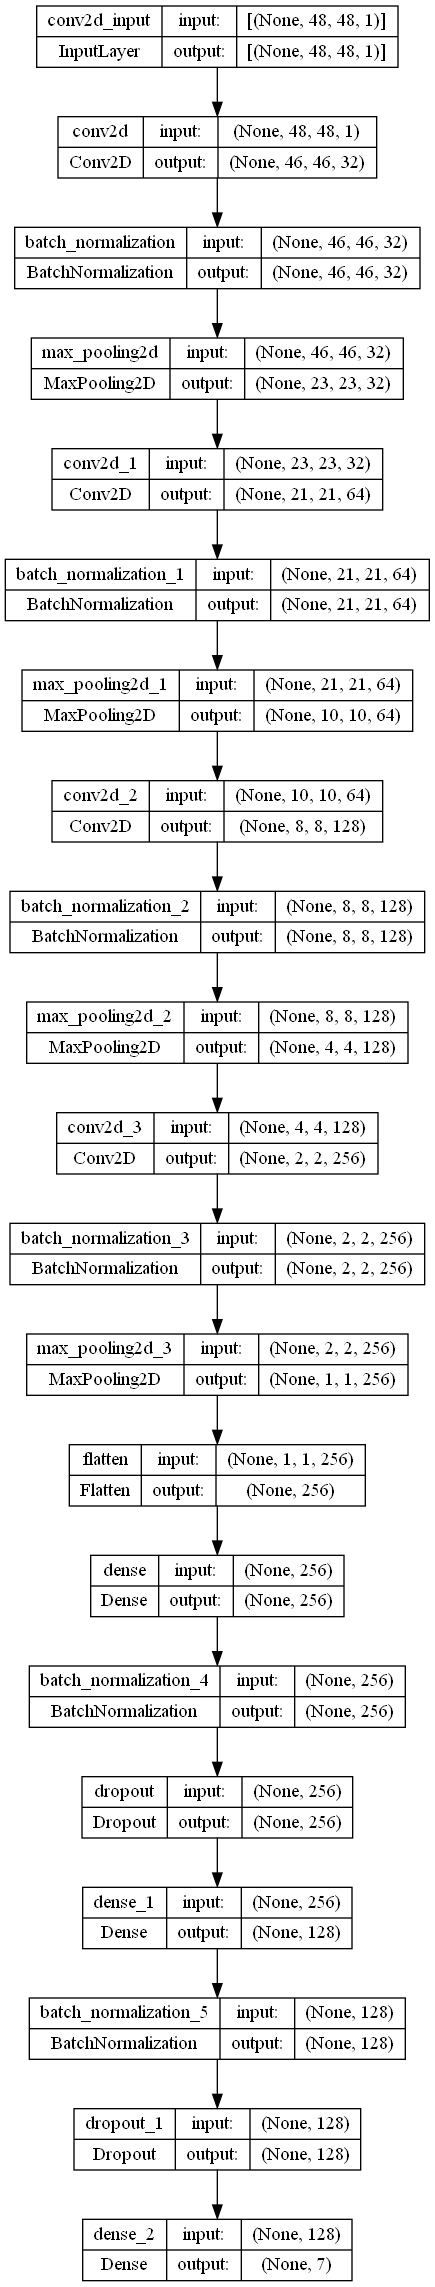

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath="model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                          min_delta=0.01,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11380\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 2.1728 - accuracy: 0.2568
Epoch 1: val_accuracy improved from -inf to 0.31051, saving model to model.h5
225/225 [==============================] - 75s 319ms/step - loss: 2.1728 - accuracy: 0.2568 - val_loss: 1.7252 - val_accuracy: 0.3105 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.6073 - accuracy: 0.3987
Epoch 2: val_accuracy improved from 0.31051 to 0.36648, saving model to model.h5
225/225 [==============================] - 62s 277ms/step - loss: 1.6073 - accuracy: 0.3987 - val_loss: 1.8058 - val_accuracy: 0.3665 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.3837 - accuracy: 0.4716
Epoch 3: val_accuracy improved from 0.36648 to 0.48594, saving model to model.h5
225/225 [==============================] - 62s 276ms/step - loss: 1.3837 - accuracy: 0.4716 - val_loss: 1.3329 - val_accuracy: 0.4859 - lr: 0.0010
Epoch 4/48
225/225 [===========

In [11]:
model.save('proposed_weights.h5')

In [12]:
from keras.models import load_model
savedModel=load_model('proposed_weights.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                        

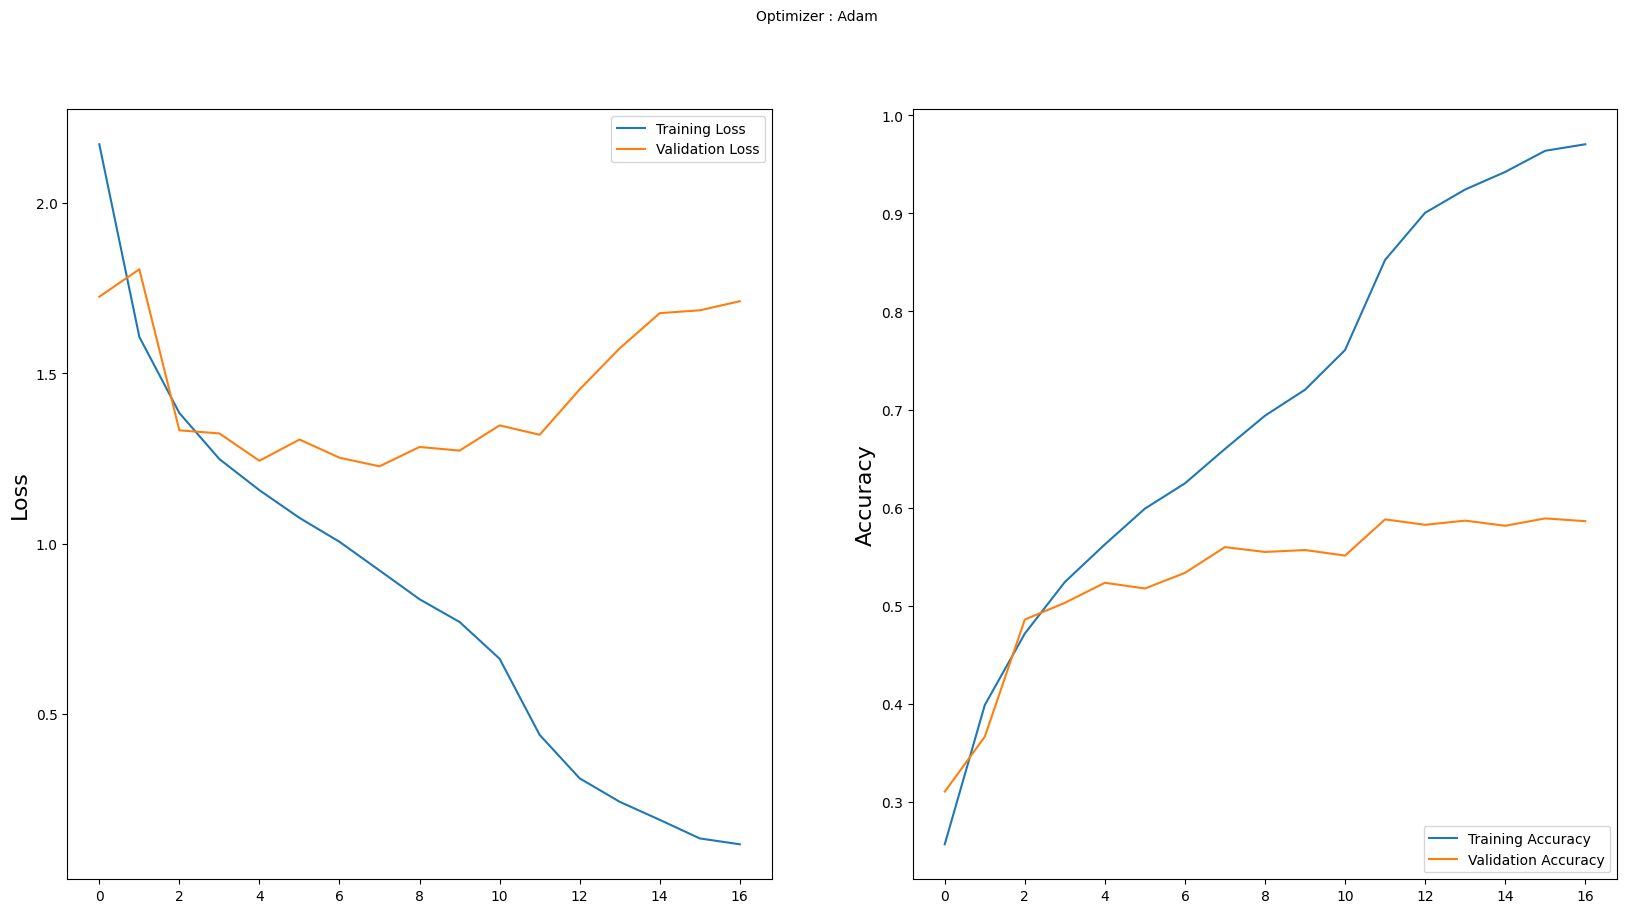

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

226/226 [==============================] - 18s 78ms/step
Confusion Matrix
[[ 529   51  529 1053  703  690  438]
 [  68    2   51  121   75   71   48]
 [ 566   51  536 1045  690  781  434]
 [1008   87  904 1819 1250 1327  769]
 [ 681   51  697 1245  847  903  558]
 [ 701   73  636 1193  822  971  542]
 [ 418   36  404  794  572  628  353]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13      3993
     disgust       0.01      0.00      0.01       436
        fear       0.14      0.13      0.14      4103
       happy       0.25      0.25      0.25      7164
     neutral       0.17      0.17      0.17      4982
         sad       0.18      0.20      0.19      4938
    surprise       0.11      0.11      0.11      3205

    accuracy                           0.18     28821
   macro avg       0.14      0.14      0.14     28821
weighted avg       0.17      0.18      0.17     28821



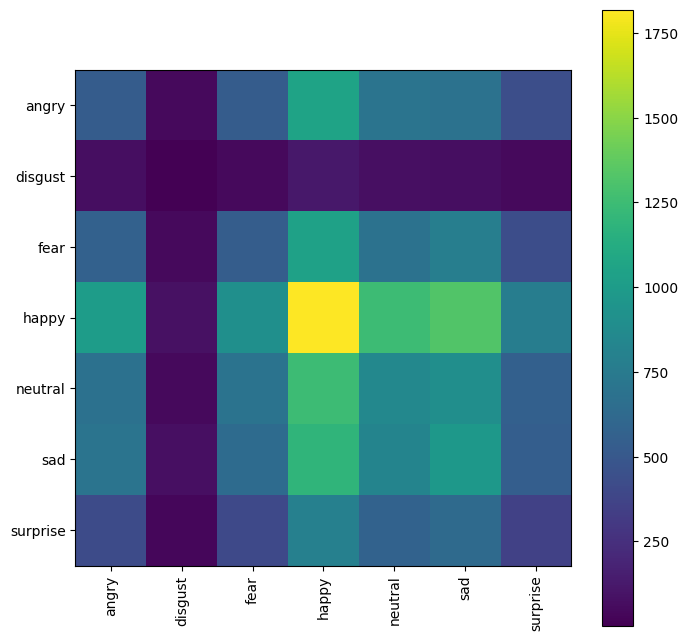

In [14]:
y_pred = model.predict(train_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

56/56 [==============================] - 4s 75ms/step
Confusion Matrix
[[ 468    6   89   67  119  192   19]
 [  29   47    9    5    3   17    1]
 [ 164    3  362   64  118  232   75]
 [  63    2   27 1484  101  120   28]
 [ 113    0   53  123  655  255   17]
 [ 135    0  114   95  179  608    8]
 [  30    0  100   69   38   28  532]]
Classification Report
              precision    recall  f1-score   support

       angry       0.47      0.49      0.48       960
     disgust       0.81      0.42      0.56       111
        fear       0.48      0.36      0.41      1018
       happy       0.78      0.81      0.80      1825
     neutral       0.54      0.54      0.54      1216
         sad       0.42      0.53      0.47      1139
    surprise       0.78      0.67      0.72       797

    accuracy                           0.59      7066
   macro avg       0.61      0.55      0.57      7066
weighted avg       0.60      0.59      0.59      7066



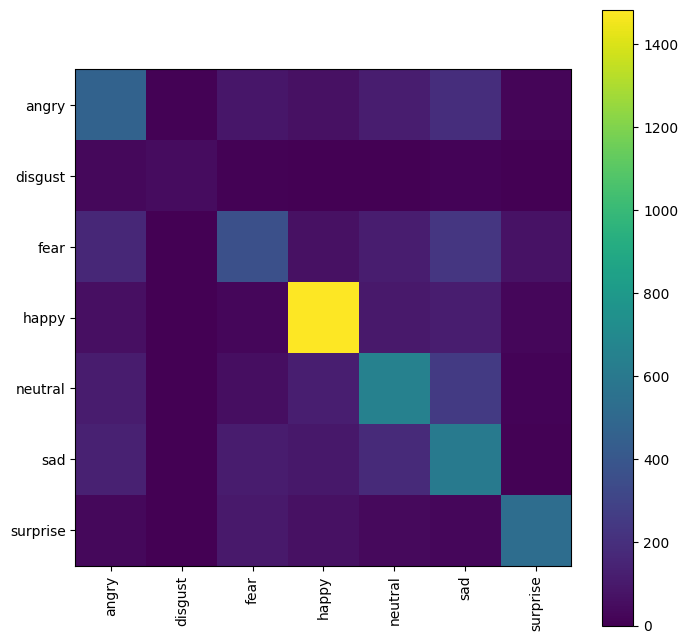

In [15]:
#TEST SET
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [16]:
model.evaluate(test_set)
preds = model.predict(test_set)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_set.labels)

56/56 [==============================] - 4s 77ms/step


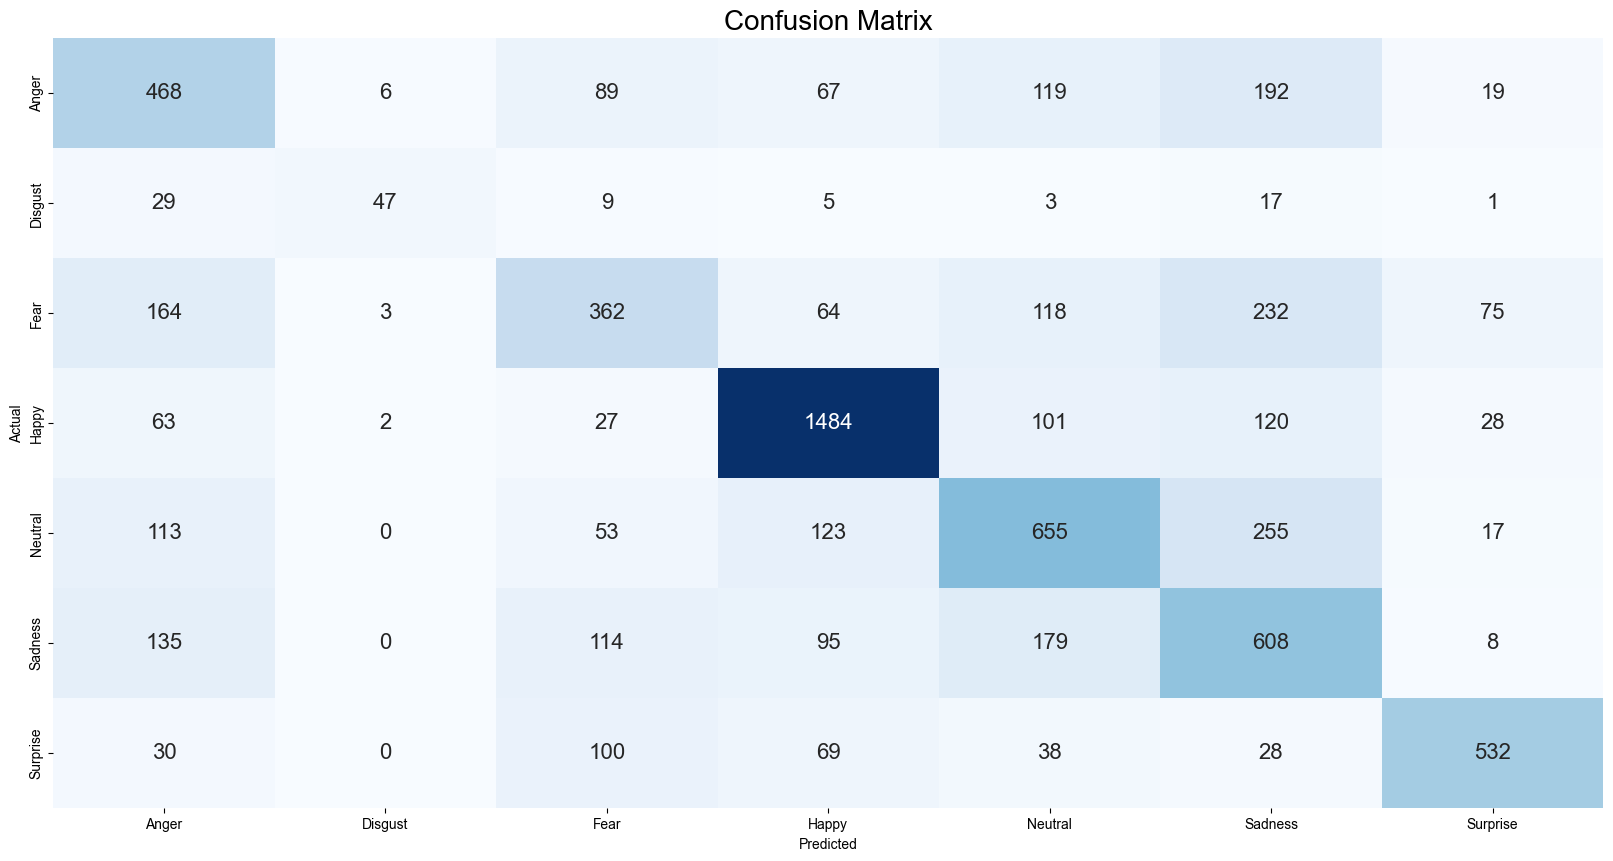

In [17]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

ROC AUC score: 0.8916747512509058


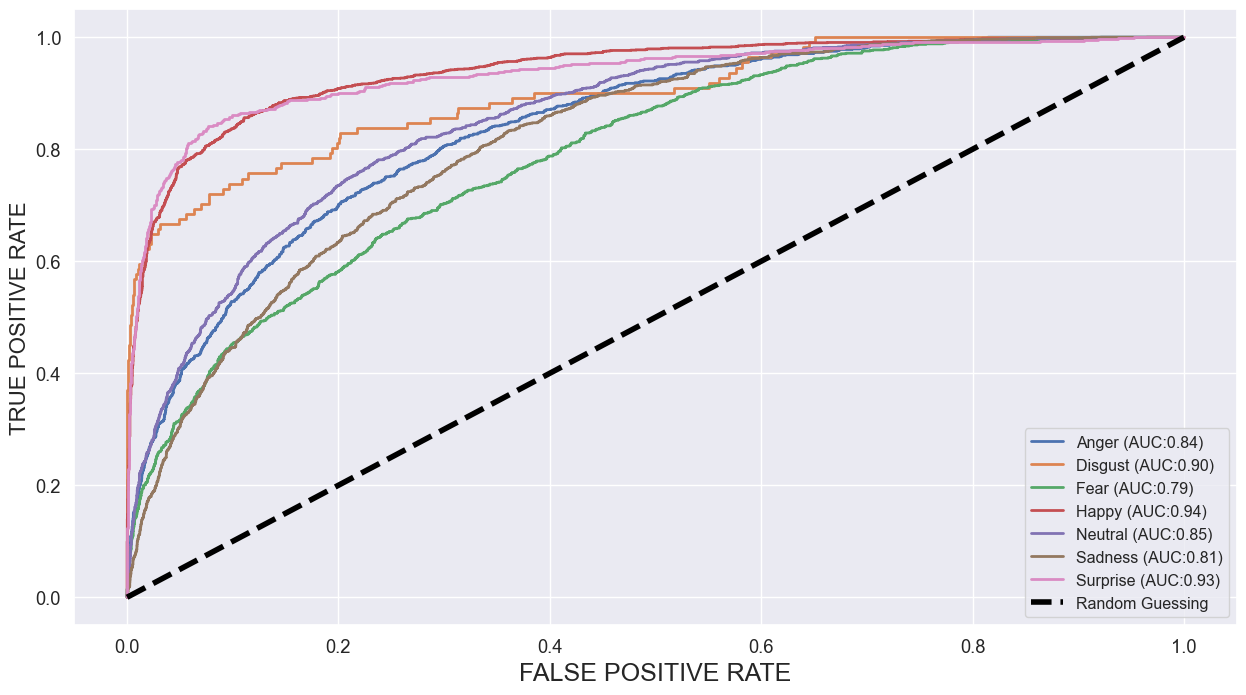

In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()